ФИО: Усцов Артем Алексеевич

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch import autograd
from torch.utils.data import DataLoader, Dataset

import torchvision
import matplotlib.pyplot as plt
import numpy as np

from torch.autograd import Variable

### Creating config object (argparse workaround)

In [2]:
class Config:
    pass

config = Config()
config.mnist_path = None
config.batch_size = 16
config.num_workers = 3
config.num_epochs = 10
config.noise_size = 50
config.print_freq = 100

### Create dataloder

In [3]:
train = torchvision.datasets.FashionMNIST("fashion_mnist", train=True, transform=torchvision.transforms.ToTensor(), download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting fashion_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to fashion_mnist/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting fashion_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to fashion_mnist/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting fashion_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to fashion_mnist/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting fashion_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to fashion_mnist/FashionMNIST/raw



In [4]:
dataloader = DataLoader(train, batch_size=16, shuffle=True)

In [5]:
len(dataloader)

3750

In [6]:
for image, cat in dataloader:
    break

In [7]:
image.size()

torch.Size([16, 1, 28, 28])

In [8]:
28*28

784

### Create generator and discriminator

In [9]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 28*28),
            nn.Sigmoid())
        
    def forward(self, x):
        return self.model(x)
    
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.ReLU(inplace=True),
            nn.Linear(200, 50),
            nn.ReLU(inplace=True),
            nn.Linear(50, 1), 
            nn.Sigmoid())
    def forward(self, x):
        return self.model(x)

In [10]:
generator = Generator()
discriminator = Discriminator()

### Create optimizers and loss

In [11]:
optim_G = optim.Adam(params=generator.parameters(), lr=0.0001)
optim_D = optim.Adam(params=discriminator.parameters(), lr=0.0001)

criterion = nn.BCELoss()

### Create necessary variables

In [12]:
input = Variable(torch.FloatTensor(config.batch_size, 28*28))
noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
fixed_noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size).normal_(0, 1))
label = Variable(torch.FloatTensor(config.batch_size)).unsqueeze(1)
real_label = 1
fake_label = 0

### Задание

1) Модифицируйте код и реализуйте [Wasserstein GAN](https://arxiv.org/abs/1701.07875) ([From GAN to WGAN
](https://lilianweng.github.io/posts/2017-08-20-gan/)) используя weight clipping. (1 балл)

2) Замените  weight clipping на [gradient penalty](https://arxiv.org/pdf/1704.00028v3.pdf). (1 балл)

3) Добавьте к обучению WGAN условие на метку, продемонстрируйте [условную генерацию](https://arxiv.org/pdf/1411.1784.pdf).  (1 балл) 

Напишите отчет о том, что попробовали, какие результаты получили, какую архитектуру использовали, как вам кажется надо обучать GAN, чтобы добиться сходимости? Каждый пункт обязательно сопроводите визуализациями.

### GAN

Epoch:1 Iter: 100 errD_x: 0.22 errD_z: 0.15 errG: 2.00
Epoch:1 Iter: 200 errD_x: 0.26 errD_z: 0.17 errG: 1.97
Epoch:1 Iter: 300 errD_x: 0.23 errD_z: 0.15 errG: 2.10
Epoch:1 Iter: 400 errD_x: 0.11 errD_z: 0.08 errG: 2.74
Epoch:1 Iter: 500 errD_x: 0.17 errD_z: 0.09 errG: 2.52
Epoch:1 Iter: 600 errD_x: 0.27 errD_z: 0.11 errG: 2.42
Epoch:1 Iter: 700 errD_x: 0.14 errD_z: 0.10 errG: 2.65
Epoch:1 Iter: 800 errD_x: 0.24 errD_z: 0.08 errG: 2.63
Epoch:1 Iter: 900 errD_x: 0.18 errD_z: 0.15 errG: 2.22
Epoch:1 Iter: 1000 errD_x: 0.18 errD_z: 0.21 errG: 1.96
Epoch:1 Iter: 1100 errD_x: 0.17 errD_z: 0.18 errG: 1.96
Epoch:1 Iter: 1200 errD_x: 0.08 errD_z: 0.51 errG: 1.34
Epoch:1 Iter: 1300 errD_x: 0.32 errD_z: 0.18 errG: 1.90
Epoch:1 Iter: 1400 errD_x: 0.47 errD_z: 0.15 errG: 2.18
Epoch:1 Iter: 1500 errD_x: 0.23 errD_z: 0.26 errG: 1.79
Epoch:1 Iter: 1600 errD_x: 0.15 errD_z: 0.24 errG: 2.02
Epoch:1 Iter: 1700 errD_x: 0.16 errD_z: 0.15 errG: 2.20
Epoch:1 Iter: 1800 errD_x: 0.10 errD_z: 0.15 errG: 2.11
E

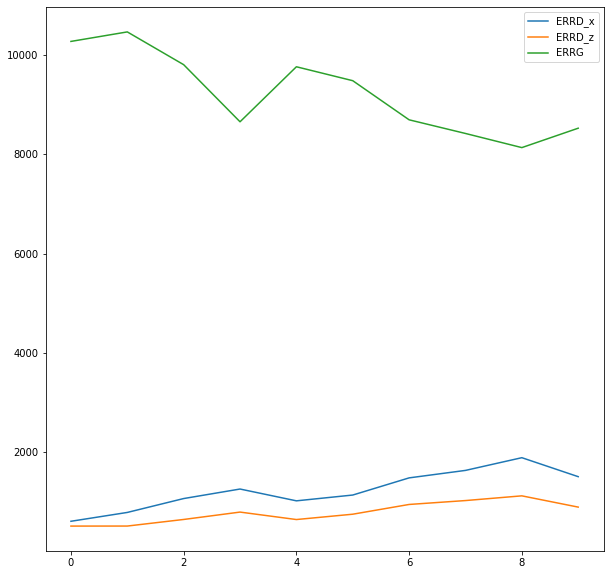

In [13]:
ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator stage: maximize log(D(x)) + log(1 - D(G(z))) 
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)
        output = discriminator(input_data)
        errD_x = criterion(output, label)
        ERRD_x[epoch] += errD_x.item()
        errD_x.backward()
        
        # fake 
        noise.data.normal_(0, 1)
        fake = generator(noise)
        label.data.fill_(fake_label)
        output = discriminator(fake.detach())
        errD_z = criterion(output, label)
        ERRD_z[epoch] += errD_z.item()
        errD_z.backward()
        
        optim_D.step()
        
        ####### 
        # Discriminator is fixed
        # Generator stage: maximize log(D(G(z)) ekv minimize (1-log(D(G(z)))
        #######
        generator.zero_grad()
        label.data.fill_(real_label) #to have only 1st elem in cross-entropy
        output = discriminator(fake) #to have only 2nd elem in gan-formula
        errG = criterion(output, label)
        ERRG[epoch] += errG.item()
        errG.backward()
        
        optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD_x: {:.2f} errD_z: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                                            iteration+1, 
                                                                                            errD_x.item(),
                                                                                            errD_z.item(), 
                                                                                            errG.item()))
            
            
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD_x')
plt.plot(ERRD_z,label='ERRD_z')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

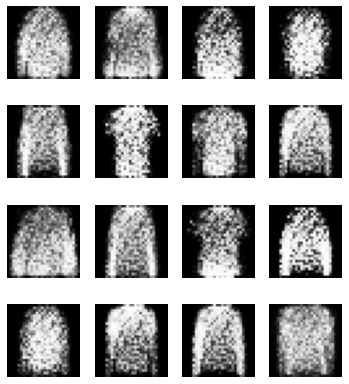

In [14]:
noise.data.normal_(0, 1)
fake = generator(noise)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

Wasserstain GAN (WGAN) with weight clipping

In [177]:
class Config:
    pass

config = Config()
config.mnist_path = None
config.batch_size = 16
config.num_workers = 3
config.num_epochs = 10
config.noise_size = 50
config.print_freq = 100

# for weight clipping
config.clip_value = 0.01

# Update the Discriminator model more 
# times than the generator each iteration
config.n_critic = 5

In [178]:
class WGenerator(nn.Module):
    def __init__(self):
        super(WGenerator, self).__init__()
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 28*28),
            nn.Tanh(),
        )
        
    def forward(self, x):
        return self.model(x)
    
class WDiscriminator(nn.Module):
    def __init__(self):
        super(WDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(50, 1), 
            # Use a linear activation function in the output layer 
            # of the discriminator model (instead of sigmoid)
        )
    def forward(self, x):
        return self.model(x)

In [179]:
generator = WGenerator()
discriminator = WDiscriminator()

# Use the RMSProp version of gradient descent 
# with small learning rate and no momentum
optim_G = optim.RMSprop(params=generator.parameters(), lr=0.00005)
optim_D = optim.RMSprop(params=discriminator.parameters(), lr=0.00005)

Epoch:1 Iter: 100 errD: -0.11 errG: -0.04
Epoch:1 Iter: 200 errD: -0.22 errG: -0.17
Epoch:1 Iter: 300 errD: -0.13 errG: -0.30
Epoch:1 Iter: 400 errD: -0.01 errG: -0.34
Epoch:1 Iter: 500 errD: 0.03 errG: -0.42
Epoch:1 Iter: 600 errD: -0.06 errG: -0.38
Epoch:1 Iter: 700 errD: -0.05 errG: -0.31
Epoch:1 Iter: 800 errD: 0.03 errG: -0.29
Epoch:1 Iter: 900 errD: 0.00 errG: -0.15
Epoch:1 Iter: 1000 errD: 0.01 errG: -0.09
Epoch:1 Iter: 1100 errD: -0.00 errG: -0.02
Epoch:1 Iter: 1200 errD: -0.00 errG: 0.06
Epoch:1 Iter: 1300 errD: -0.02 errG: 0.05
Epoch:1 Iter: 1400 errD: -0.02 errG: 0.02
Epoch:1 Iter: 1500 errD: -0.04 errG: 0.00
Epoch:1 Iter: 1600 errD: -0.02 errG: 0.01
Epoch:1 Iter: 1700 errD: -0.05 errG: 0.03
Epoch:1 Iter: 1800 errD: -0.04 errG: 0.04
Epoch:1 Iter: 1900 errD: -0.05 errG: 0.05
Epoch:1 Iter: 2000 errD: -0.05 errG: 0.06
Epoch:1 Iter: 2100 errD: -0.06 errG: 0.06
Epoch:1 Iter: 2200 errD: -0.03 errG: 0.06
Epoch:1 Iter: 2300 errD: -0.05 errG: 0.06
Epoch:1 Iter: 2400 errD: -0.05 errG:

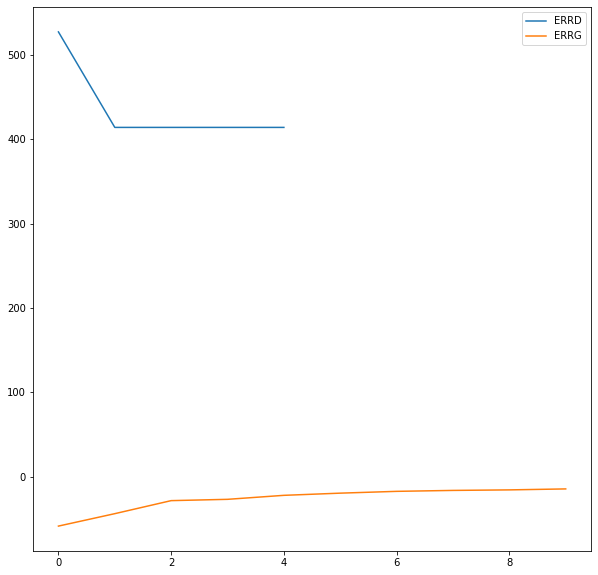

In [180]:
noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

ERRD = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator maximize: D(x) - D(G(z))
        """The discriminator tries to maximize this function. 
        In other words, it tries to maximize the difference between its output 
        on real instances and its output on fake instances."""
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)


        noise.data.normal_(0, 1)
        fake = generator(noise)

        # Use Wasserstein loss to train the discriminator and generator models 
        # that promote larger difference between scores 
        # for real and generated images.
        errD = torch.mean(discriminator(fake.detach())) - torch.mean(discriminator(input_data))
        ERRD[epoch] += errD.item()
        errD.backward()

        optim_D.step()

        # Constrain discriminator model weights to a limited 
        # range after each mini batch update.
        # Weight clipping
        for p in discriminator.parameters():
            p.data.clamp_(-config.clip_value, config.clip_value)

        # Update the generator model less 
        # times than the discriminator each iteration
        if iteration % config.n_critic == 0:
        
            ####### 
            # Discriminator is fixed
            # Generator Maximize: D(G(z))
            """The generator tries to maximize this function. 
            In other words, It tries to maximize the discriminator's 
            output for its fake instances.
            """
            #######
            generator.zero_grad()
            label.data.fill_(real_label) #to have only 1st elem in cross-entropy
            output = discriminator(fake) #to have only 2nd elem in gan-formula
            errG = -torch.mean(output)
            ERRG[epoch] += errG.item()
            errG.backward()
            
            optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                      iteration+1, 
                                                                      errD.item(),
                                                                      errG.item()))
            
            
            
                 
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

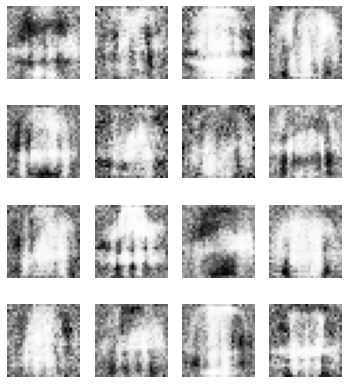

In [181]:
noise.data.normal_(0, 1)
fake = generator(noise)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

Wasserstain GAN (WGAN) with gradient penalty

In [195]:
class Config:
    pass

config = Config()
config.mnist_path = None
config.batch_size = 16
config.num_workers = 3
config.num_epochs = 10
config.noise_size = 50
config.print_freq = 100

# for weight clipping
config.clip_value = 0.01

# Update the Discriminator model more 
# times than the generator each iteration
config.n_critic = 5

# the penalty coefficient
config.w_gp = 10

In [196]:
class WGenerator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 28*28),
            nn.Tanh(),
        )
        
    def forward(self, x):
        return self.model(x)
    
class WDiscriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(50, 1), 
            # Use a linear activation function in the output layer 
            # of the discriminator model (instead of sigmoid)
        )
    def forward(self, x):
        return self.model(x)

In [197]:
generator = WGenerator()
discriminator = WDiscriminator()

# Use the RMSProp version of gradient descent 
# with small learning rate and no momentum
optim_G = optim.RMSprop(params=generator.parameters(), lr=0.00005)
optim_D = optim.RMSprop(params=discriminator.parameters(), lr=0.00005)

In [198]:
def grad_penalty(M, real_data, fake_data, lmbda):

    alpha = torch.rand(real_data.size(0), 1, 1, 1)
    lerp = alpha * real_data + ((1 - alpha) * fake_data)
    lerp.requires_grad = True
    lerp_d = M.model(lerp)

    gradients = torch.autograd.grad(
        outputs=lerp_d, 
        inputs=lerp, 
        grad_outputs=torch.ones(lerp_d.size()), 
        create_graph=True, 
        retain_graph=True, 
        only_inputs=True,
        )[0]

    gradients = gradients.view(gradients.size(0), -1)
    return ((gradients.norm(2, dim=1) - 1) ** 2).mean() * lmbda

Epoch:1 Iter: 100 errD_x: 2.12 errD_z: 0.26 errG: -0.24
Epoch:1 Iter: 200 errD_x: 2.59 errD_z: 0.68 errG: -0.65
Epoch:1 Iter: 300 errD_x: 2.46 errD_z: 0.90 errG: -0.88
Epoch:1 Iter: 400 errD_x: 2.04 errD_z: 1.06 errG: -1.11
Epoch:1 Iter: 500 errD_x: 2.38 errD_z: 1.28 errG: -1.27
Epoch:1 Iter: 600 errD_x: 2.51 errD_z: 1.25 errG: -1.18
Epoch:1 Iter: 700 errD_x: 2.13 errD_z: 1.39 errG: -1.33
Epoch:1 Iter: 800 errD_x: 1.93 errD_z: 1.27 errG: -1.23
Epoch:1 Iter: 900 errD_x: 1.87 errD_z: 1.16 errG: -1.16
Epoch:1 Iter: 1000 errD_x: 1.45 errD_z: 0.87 errG: -0.83
Epoch:1 Iter: 1100 errD_x: 1.49 errD_z: 0.55 errG: -0.61
Epoch:1 Iter: 1200 errD_x: 1.16 errD_z: 0.34 errG: -0.32
Epoch:1 Iter: 1300 errD_x: 1.02 errD_z: 0.04 errG: -0.10
Epoch:1 Iter: 1400 errD_x: 1.07 errD_z: -0.01 errG: 0.07
Epoch:1 Iter: 1500 errD_x: 1.35 errD_z: 0.31 errG: -0.21
Epoch:1 Iter: 1600 errD_x: 0.81 errD_z: -0.03 errG: -0.05
Epoch:1 Iter: 1700 errD_x: 0.98 errD_z: 0.24 errG: -0.24
Epoch:1 Iter: 1800 errD_x: 1.32 errD_z:

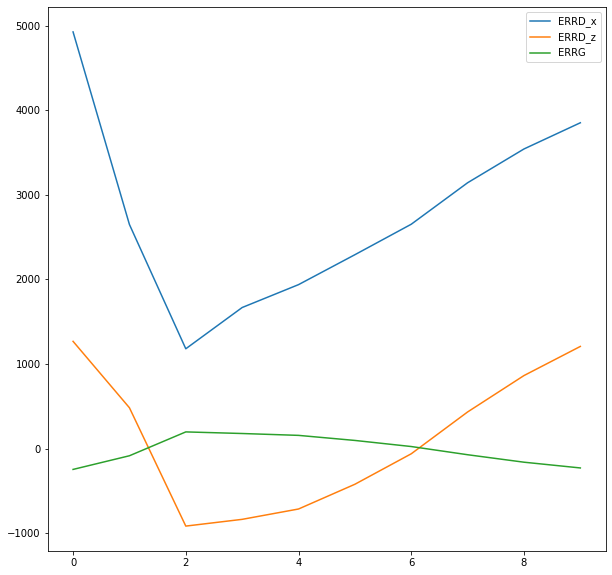

In [199]:
noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

ERRD = np.zeros(config.num_epochs)
ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
N = len(dataloader)

for epoch in range(config.num_epochs):
      for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator maximize: D(x) - D(G(z))
        """The discriminator tries to maximize this function. 
        In other words, it tries to maximize the difference between its output 
        on real instances and its output on fake instances."""
        #######
        discriminator.zero_grad()
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)
        output = discriminator(input_data)
        errD_x = torch.mean(output)
        ERRD_x[epoch] += errD_x.item()
        errD_x.backward(-1.0*torch.ones(1)[0])
        
        # fake 
        noise.data.normal_(0, 1)
        fake = generator(noise)
        label.data.fill_(fake_label)
        output = discriminator(fake.detach())
        errD_z = torch.mean(output)
        ERRD_z[epoch] += errD_z.item()
        errD_z.backward(1.0*torch.ones(1)[0])
        
        # gradient penalty
        grad_pen = grad_penalty(
            discriminator,
            input_data.data,
            fake.data,
            lmbda=config.w_gp,
        )
        grad_pen.backward()

        optim_D.step()
        
        # Update the generator model less 
        # times than the discriminator each iteration
        if iteration % config.n_critic == 0:
        
            ####### 
            # Discriminator is fixed
            # Generator Maximize: D(G(z))
            """The generator tries to maximize this function. 
            In other words, It tries to maximize the discriminator's 
            output for its fake instances.
            """
            #######
            generator.zero_grad()
            label.data.fill_(real_label) #to have only 1st elem in cross-entropy
            output = discriminator(fake) #to have only 2nd elem in gan-formula
            errG = -torch.mean(output)
            ERRG[epoch] += errG.item()
            errG.backward()
            
            optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD_x: {:.2f} errD_z: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                                        iteration+1, 
                                                                                        errD_x.item(),
                                                                                        errD_z.item(), 
                                                                                        errG.item()))
            
            
            
                 
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD_x')
plt.plot(ERRD_z,label='ERRD_z')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

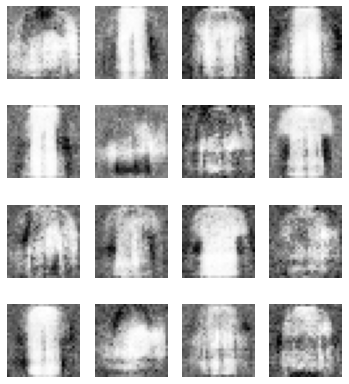

In [200]:
noise.data.normal_(0, 1)
fake = generator(noise)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

Wasserstain GAN (WGAN) with conditional generation

In [237]:
class Config:
    pass

config = Config()
config.mnist_path = None
config.batch_size = 16
config.num_workers = 3
config.num_epochs = 10
config.noise_size = 50
config.print_freq = 100

# for weight clipping
config.clip_value = 0.01

# Update the Discriminator model more 
# times than the generator each iteration
config.n_critic = 5

# for conditional generating
config.emb_size = 256
config.num_classes = 10

In [243]:
class WGeneratorConditional(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Linear(config.num_classes, config.emb_size)
        self.model = nn.Sequential( 
            nn.Linear(config.noise_size + config.emb_size, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 28*28),
            nn.Tanh())
        
    def forward(self, x, y):
        emb = self.embedding(y)
        z = torch.cat([x, emb], 1)
        return self.model(z)


class WDiscriminatorConditional(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Linear(config.num_classes, config.emb_size)
        self.model = nn.Sequential(
            nn.Linear(28*28 + config.emb_size, 200),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(200, 50),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(50, 1))
            # Use a linear activation function in the output layer 
            # of the discriminator model (instead of sigmoid)
        
    def forward(self, x, y):
        emb = self.embedding(y)
        im = torch.cat([x, emb], 1)
        return self.model(im)

In [244]:
generator = WGeneratorConditional()
discriminator = WDiscriminatorConditional()


optim_G = optim.RMSprop(params=generator.parameters(), lr=0.00005)
optim_D = optim.RMSprop(params=discriminator.parameters(), lr=0.00005)

Epoch:1 Iter: 100 errD: -0.06 errG: -0.03
Epoch:1 Iter: 200 errD: 0.01 errG: -0.04
Epoch:1 Iter: 300 errD: -0.00 errG: 0.01
Epoch:1 Iter: 400 errD: -0.01 errG: 0.03
Epoch:1 Iter: 500 errD: -0.02 errG: 0.02
Epoch:1 Iter: 600 errD: -0.02 errG: 0.03
Epoch:1 Iter: 700 errD: -0.04 errG: 0.03
Epoch:1 Iter: 800 errD: -0.04 errG: 0.01
Epoch:1 Iter: 900 errD: -0.06 errG: 0.05
Epoch:1 Iter: 1000 errD: -0.06 errG: 0.05
Epoch:1 Iter: 1100 errD: -0.06 errG: 0.03
Epoch:1 Iter: 1200 errD: -0.06 errG: 0.07
Epoch:1 Iter: 1300 errD: -0.08 errG: 0.05
Epoch:1 Iter: 1400 errD: -0.07 errG: 0.06
Epoch:1 Iter: 1500 errD: -0.07 errG: 0.05
Epoch:1 Iter: 1600 errD: -0.10 errG: 0.07
Epoch:1 Iter: 1700 errD: -0.07 errG: 0.06
Epoch:1 Iter: 1800 errD: -0.07 errG: 0.05
Epoch:1 Iter: 1900 errD: -0.08 errG: 0.10
Epoch:1 Iter: 2000 errD: -0.08 errG: 0.08
Epoch:1 Iter: 2100 errD: -0.06 errG: 0.09
Epoch:1 Iter: 2200 errD: -0.06 errG: 0.08
Epoch:1 Iter: 2300 errD: -0.11 errG: 0.08
Epoch:1 Iter: 2400 errD: -0.07 errG: 0.06


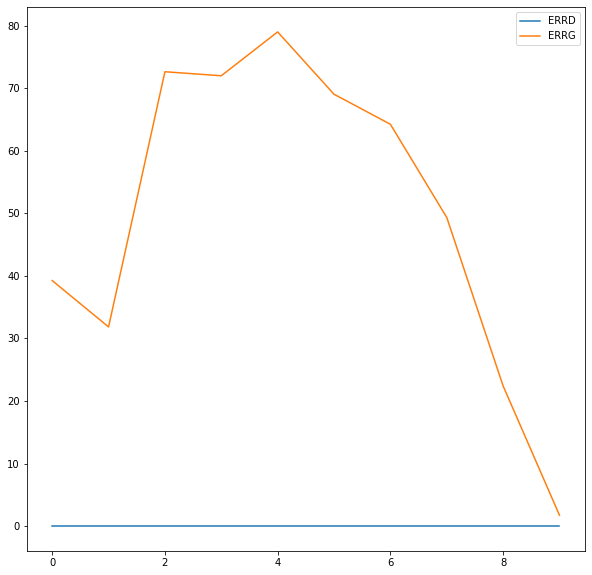

In [246]:
noise = Variable(torch.FloatTensor(config.batch_size, config.noise_size))
label = Variable(torch.FloatTensor(config.batch_size))
real_label = 1
fake_label = 0

ERRD_x = np.zeros(config.num_epochs)
ERRD_z = np.zeros(config.num_epochs)
ERRG = np.zeros(config.num_epochs)
#z is noise
#x is pictures
N = len(dataloader)

for epoch in range(config.num_epochs):
    for iteration, (images, cat) in enumerate(dataloader):
        ####### 
        # Generator is fixed
        # Discriminator maximize: D(x) - D(G(z))
        """The discriminator tries to maximize this function. 
        In other words, it tries to maximize the difference between its output 
        on real instances and its output on fake instances."""
        #######
        discriminator.zero_grad()

        one_hot_cat = Variable(torch.zeros(config.batch_size, config.num_classes))
        one_hot_cat[:, cat] = 1.0
        
        # real
        label.data.fill_(real_label)
        input_data = images.view(images.shape[0], -1)


        noise.data.normal_(0, 1)
        fake = generator(noise, one_hot_cat)

        # Use Wasserstein loss to train the discriminator and generator models 
        # that promote larger difference between scores 
        # for real and generated images.
        errD = torch.mean(discriminator(fake.detach(), one_hot_cat)) - \
                              torch.mean(discriminator(input_data, one_hot_cat))
        ERRD[epoch] += errD.item()
        errD.backward()

        optim_D.step()

        # Constrain discriminator model weights to a limited 
        # range after each mini batch update.
        # Weight clipping
        for p in discriminator.parameters():
            p.data.clamp_(-config.clip_value, config.clip_value)

        # Update the generator model less 
        # times than the discriminator each iteration
        if iteration % config.n_critic == 0:
        
            ####### 
            # Discriminator is fixed
            # Generator Maximize: D(G(z))
            """The generator tries to maximize this function. 
            In other words, It tries to maximize the discriminator's 
            output for its fake instances.
            """
            #######
            generator.zero_grad()
            label.data.fill_(real_label) #to have only 1st elem in cross-entropy
            output = discriminator(fake, one_hot_cat) #to have only 2nd elem in gan-formula
            errG = -torch.mean(output)
            ERRG[epoch] += errG.item()
            errG.backward()
            
            optim_G.step()
        
        if (iteration+1) % config.print_freq == 0:
            print('Epoch:{} Iter: {} errD: {:.2f} errG: {:.2f}'.format(epoch+1,
                                                                      iteration+1, 
                                                                      errD.item(),
                                                                      errG.item()))
            
            
            
                 
plt.figure(figsize=(10,10))
plt.plot(ERRD_x,label='ERRD')
plt.plot(ERRG,label='ERRG')
plt.legend()
plt.show()

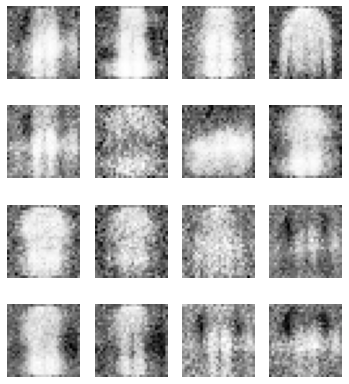

In [247]:
noise.data.normal_(0, 1)
one_hot_cat = torch.zeros(config.batch_size, config.num_classes)
one_hot_cat[ torch.randint(0, 9, (config.batch_size,) ) ] = 1.0

fake = generator(noise, one_hot_cat)

plt.figure(figsize=(6, 7))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(fake[i].detach().numpy().reshape(28, 28), cmap=plt.cm.Greys_r)
    plt.axis('off')

Лучше всего себя показал WGAN с условием на метку, генерируя правдоподобные изображения одежды. 

WGAN с gradient penalty оказался лучше, чем WGAN с клиппингом весов, однако он дольше всего обучается.
Вероятно, имея много GPU, а также попробовав добавить в WGAN с gradinet penalty условие на метку, получатся наиболее правдоподобные генеративные модели